<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Expensive Football players analysis
</h1>
</div>

![](https://www.teahub.io/photos/full/6-69359_cristiano-ronaldo-wallpaper-4k-full-hd-cr7-wallpaper.jpg)

#### He is my favorite football player ( Cristiano Ronaldo )

### Hello ~! 
### This time, I will analysis the expensive football player transfers

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
font = fm.FontProperties(fname='Staatliches-Regular.ttf')
data = pd.read_csv("football_players.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


In [5]:
data.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,54.0,27.444444,15.716434,1.0,14.250,27.5,40.75,54.0
Fee(€ mln),54.0,83.159259,30.174258,60.0,64.625,75.0,86.50,222.0
Year,54.0,2016.629630,4.296977,2000.0,2015.250,2018.0,2019.00,2021.0
Born,54.0,1991.888889,5.932535,1972.0,1989.250,1993.0,1996.00,2000.0


### I have 54 data. This data has means

* Rank: Rank of transfer

* Origin : Origin Country of Player

* Player : Player Name

* From(Country) : From which country the player transferred?

* From(Club) : From which Club the player transferred?

* To(Country) : To which country the player transferred?

* To(Club) : To which Club the player transferred?

* Position : Position of The player

* Fee(€ mln) : How much fee were paid for the transfer as € mln.

* Fee(£ mln) : How much fee were paid for the transfer as £ mln.

* Year : In which year the transfer occured?

* Born : When was the player born?


### Then, Start analysis !

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
1. The average of player trade price each position
</h1>
</div>

### Football has 4 position largely 
* Forward

* Midfielder

* Defender

* Goalkeeper

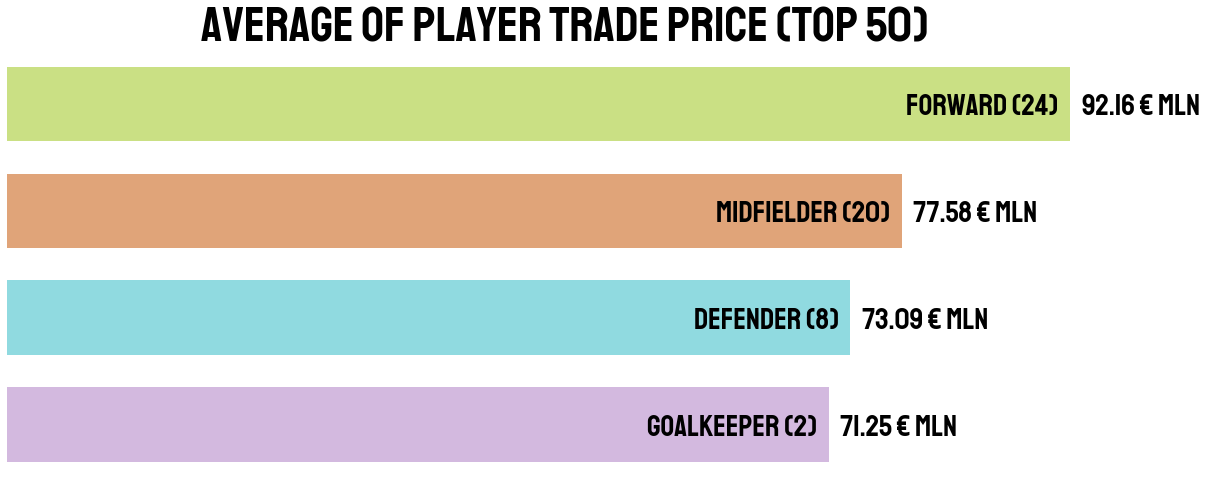

In [8]:
data.columns = ['Rank', 'Origin', 'Player', 'From_Country', 'From_Club',
       'To_Country', 'To_Club', 'Position', 'Fee_€ mln','Fee_£ mln','Year', 'Born']

data['Position'] = data['Position'].apply(lambda x : x if x!='Striker' else 'Forward')
position = pd.DataFrame(data.groupby('Position')['Fee_€ mln'].mean())
position = position.sort_values('Fee_€ mln', axis=0,ascending=True)
each_position_count = data['Position'].value_counts()

fig = plt.figure(figsize=(20,8))
plt.barh(width=position['Fee_€ mln'], y=position.index,height=0.7, color = ['#D3B9DF','#90DAE0','#E0A479','#CAE084'])
for i in range(len(position)):
    plt.text(s = f"{position.index[i]} ({each_position_count[i*-1 +3]})", x=round(position['Fee_€ mln'][i]-1,2), y=i ,font = font, fontsize=30,va='center',ha='right')
    plt.text(s = f"{round(position['Fee_€ mln'][i],2)} € mln", x=round(position['Fee_€ mln'][i]+1,2), y=i ,font = font, fontsize=30,va='center',ha='left')

plt.title("average of player trade price (Top 50)",font=font, fontsize=50)
plt.axis('off')
plt.show()

### If you see this chart, you can feel forward position is the most price position and Goalkeeper position is the lowest position. But it's only 2 players

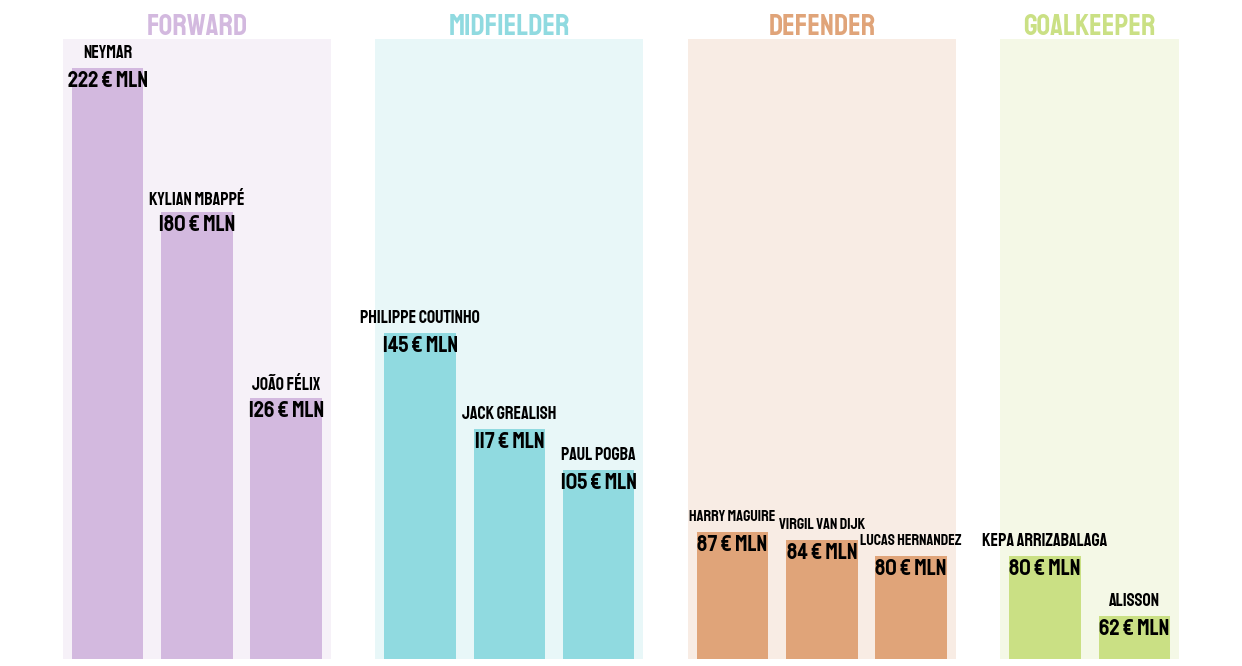

In [9]:
forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(22,12), facecolor="w")
plt.bar(x= [0,1,2], height=forward['Fee_€ mln'], color ='#D3B9DF')
plt.bar(x= [3.5,4.5,5.5], height=mid['Fee_€ mln'], color='#90DAE0')
plt.bar(x= [7,8,9], height=defend['Fee_€ mln'], color ='#E0A479')
plt.bar(x= [10.5,11.5], height=goalkeeper['Fee_€ mln'], color ='#CAE084')

ax.axvspan(xmin = -0.5,xmax= 2.5, ymax= 0.95, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin = 3,xmax= 6, ymax= 0.95, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin = 6.5,xmax= 9.5, ymax= 0.95, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin = 10,xmax= 12, ymax= 0.95, fc='#CAE084', alpha=0.2)

for i in range(len(forward)):
    plt.text(s = forward.loc[i,'Player'], x= i, y= forward.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(forward.loc[i,'Fee_€ mln'])} € mln", x= i, y= forward.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)
    
    plt.text(s = mid.loc[i,'Player'], x= i+3.5, y= mid.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(mid.loc[i,'Fee_€ mln'])} € mln", x= i+3.5, y= mid.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)
    
    plt.text(s = defend.loc[i,'Player'], x= i+7, y= defend.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 16)
    plt.text(s = f"{round(defend.loc[i,'Fee_€ mln'])} € mln", x= i+7, y= defend.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)
    
    if i ==2:
        break
    plt.text(s = goalkeeper.loc[i,'Player'], x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']+5, va='center', ha='center',font=font, fontsize= 18)
    plt.text(s = f"{round(goalkeeper.loc[i,'Fee_€ mln'])} € mln", x= i+10.5, y= goalkeeper.loc[i,'Fee_€ mln']-3, va='center', ha='center',font=font, fontsize= 23)

plt.text(s = "forward", x= 1, y= 235, va='center', ha='center',font=font, fontsize= 30,color ='#D3B9DF')
plt.text(s = "Midfielder", x= 4.5, y= 235, va='center', ha='center',font=font, fontsize= 30, color='#90DAE0')
plt.text(s = "Defender", x= 8, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#E0A479')
plt.text(s = "Goalkeeper", x= 11, y= 235, va='center', ha='center',font=font, fontsize= 30, color ='#CAE084')

plt.ylim(50,240)
plt.axis('off')
plt.show()

### You can feel that each position's price gap
### Look the forward position. Neymar records the best expensive price.

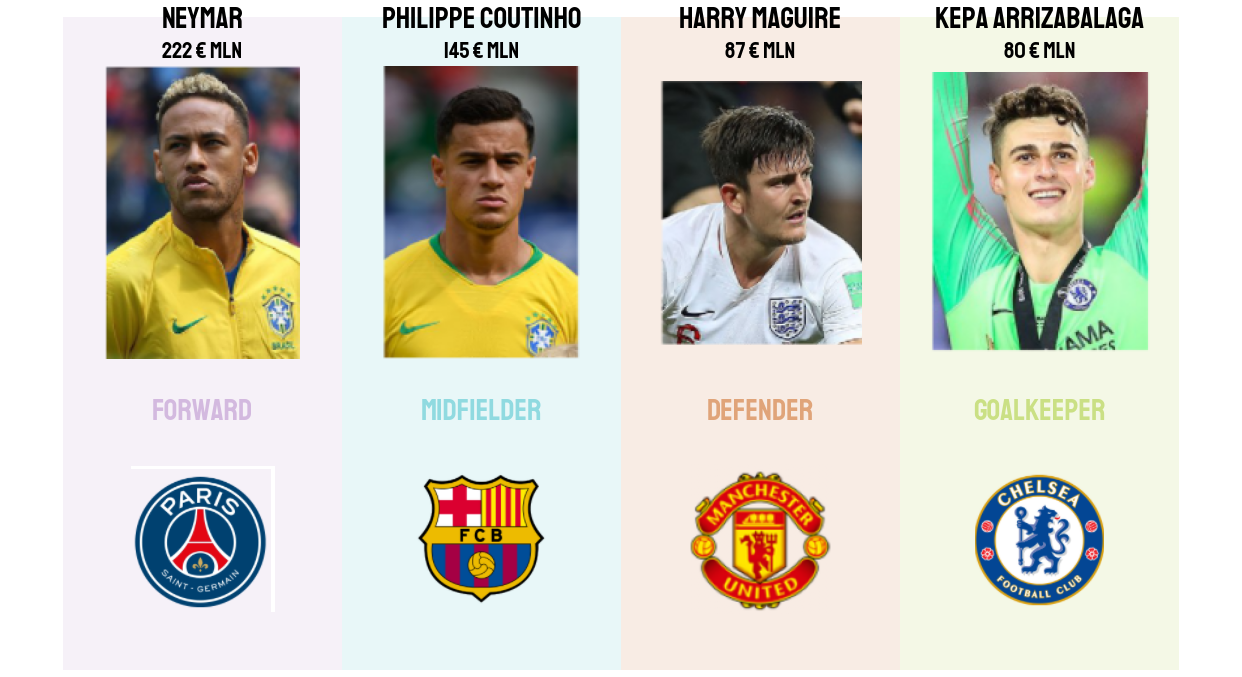

In [27]:
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

forward = data[data['Position'] == 'Forward'].head(3).reset_index(drop=True)
mid = data[data['Position'] == 'Midfielder'].head(3).reset_index(drop=True)
defend = data[data['Position'] == 'Defender'].head(3).reset_index(drop=True)
goalkeeper = data[data['Position'] == 'Goalkeeper'].head(3).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(22,12), facecolor="w")
ax.axvspan(xmin = 0,xmax= 4, ymax= 1, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin = 4,xmax= 8, ymax= 1, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin = 8,xmax= 12, ymax= 1, fc='#E0A479', alpha=0.2)
ax.axvspan(xmin = 12,xmax= 16, ymax= 1, fc='#CAE084', alpha=0.2)

make_img('images/neymar.png', 1.5, 2, 0.7)
make_img('images/psg.png', 1, 2, 0.2)
make_img('images/Coutinho.png', 1.5, 6, 0.7)
make_img('images/barcelona.png', 1, 6, 0.2)
make_img('images/Maguire.png', 1.4, 10, 0.7)
make_img('images/manchester.png', 1.2, 10, 0.2)
make_img('images/kepa.png', 1.5, 14, 0.7)
make_img('images/chelsea.png', 1, 14, 0.2)

plt.text(s = forward.loc[0,'Player'], x= 2, y= 1, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = mid.loc[0,'Player'], x= 6, y=  1, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = defend.loc[0,'Player'], x= 10, y=  1, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = goalkeeper.loc[0,'Player'], x= 14, y=  1, va='center', ha='center',font=font, fontsize= 30)

plt.text(s = f"{round(forward.loc[0,'Fee_€ mln'])} € mln", x= 2, y= 0.95, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = f"{round(mid.loc[0,'Fee_€ mln'])} € mln", x= 6, y= 0.95, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = f"{round(defend.loc[0,'Fee_€ mln'])} € mln", x= 10, y= 0.95, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = f"{round(goalkeeper.loc[0,'Fee_€ mln'])} € mln", x= 14, y= 0.95, va='center', ha='center',font=font, fontsize= 23)



plt.text(s = "forward", x= 2, y= 0.4, va='center', ha='center',font=font, fontsize= 30,color ='#D3B9DF')
plt.text(s = "Midfielder", x= 6, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color='#90DAE0')
plt.text(s = "Defender", x= 10, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color ='#E0A479')
plt.text(s = "Goalkeeper", x= 14, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color ='#CAE084')

plt.axis('off')
plt.show()

### This is each position's most expensive players, you can feel forward and midfileder position are more expensive than defender and goalkeeper

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
2. Where club  trade the player most?
</h1>
</div>

### Now, Recognize the club that trade the player most

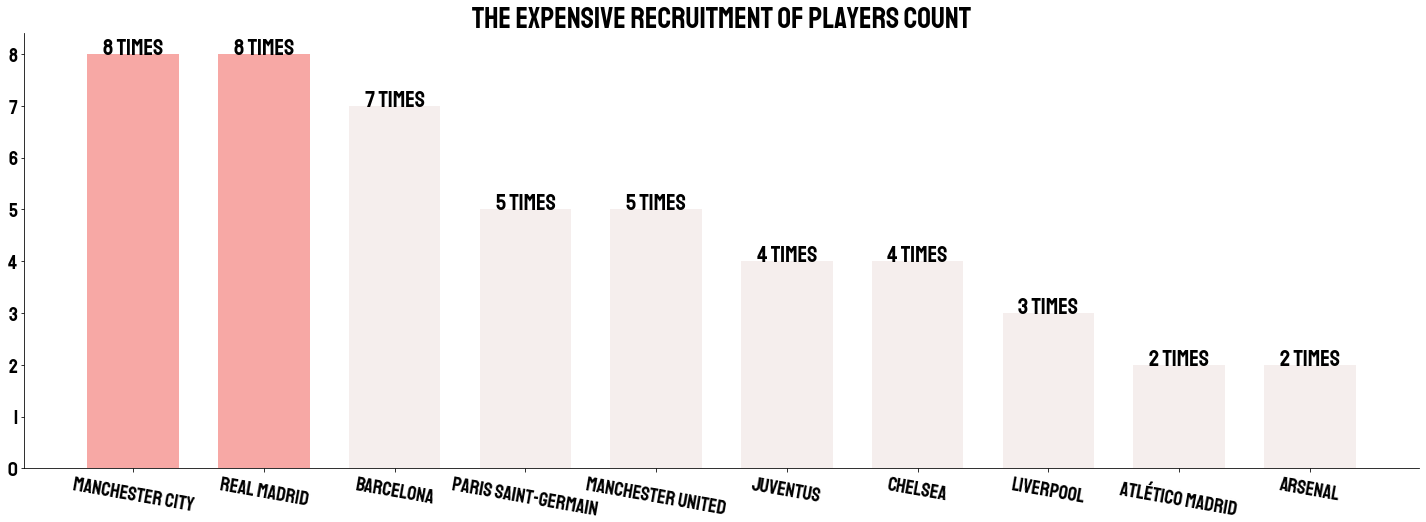

In [28]:
many_club_all = data['To_Club'].value_counts()
many_club = pd.DataFrame(many_club_all[:10]).reset_index()
many_club.columns = ['team', 'count']

color = ['#F7A8A5', '#F7A8A5']
color += ['#F5EEED']*8
plt.figure(figsize=(25,8))
plt.bar(x=many_club['team'], height = many_club['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club)):
    plt.text(s= f"{many_club.loc[i,'count']} times", x= i, y=many_club.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive Recruitment of players count", font=font, fontsize=30)
plt.show()

#### If you see the bar chart, Real Madrid and Manchester city are the most trade clubs.

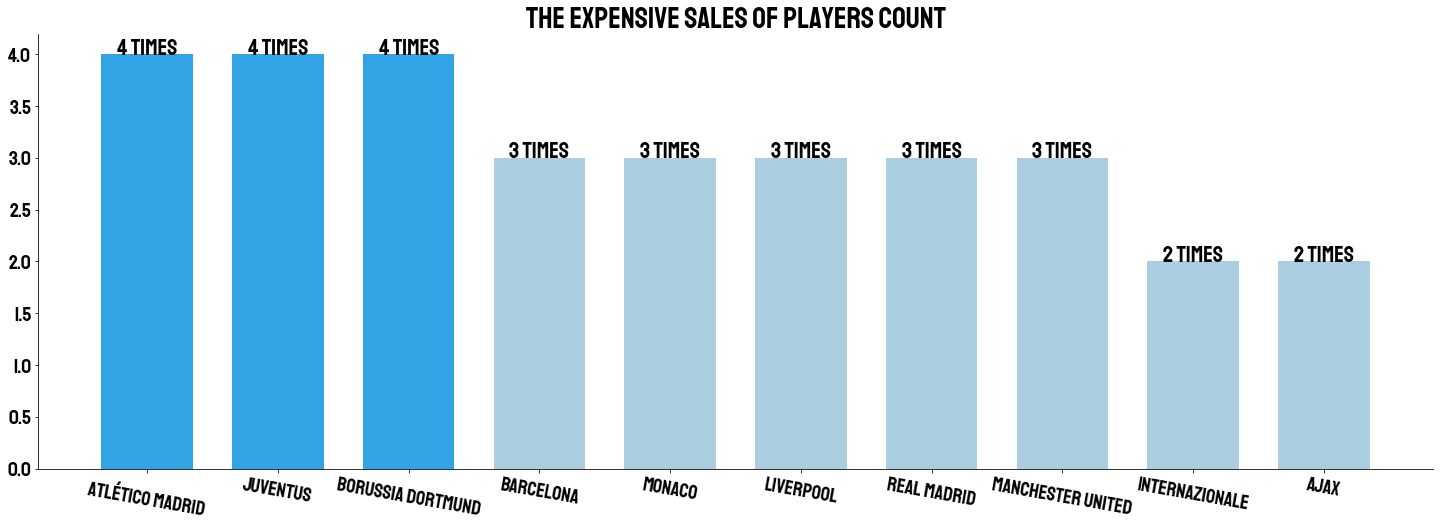

In [29]:
many_club_sale_all = data['From_Club'].value_counts()
many_club_sale = pd.DataFrame(many_club_sale_all[:10]).reset_index()
many_club_sale.columns = ['team', 'count']

color = ['#32A4E6']*3
color += ['#ABCDE0']*7
plt.figure(figsize=(25,8))
plt.bar(x=many_club_sale['team'], height = many_club_sale['count'],width=0.7,color =color)
plt.xticks(font=font,fontsize=20,rotation=350)
plt.yticks(font=font,fontsize=20)

for i in range(len(many_club_sale)):
    plt.text(s= f"{many_club_sale.loc[i,'count']} times", x= i, y=many_club_sale.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive sales of players count", font=font, fontsize=30)
plt.show()

### And, Atletico madrid and borussia dortmund, juventus record the most sale club

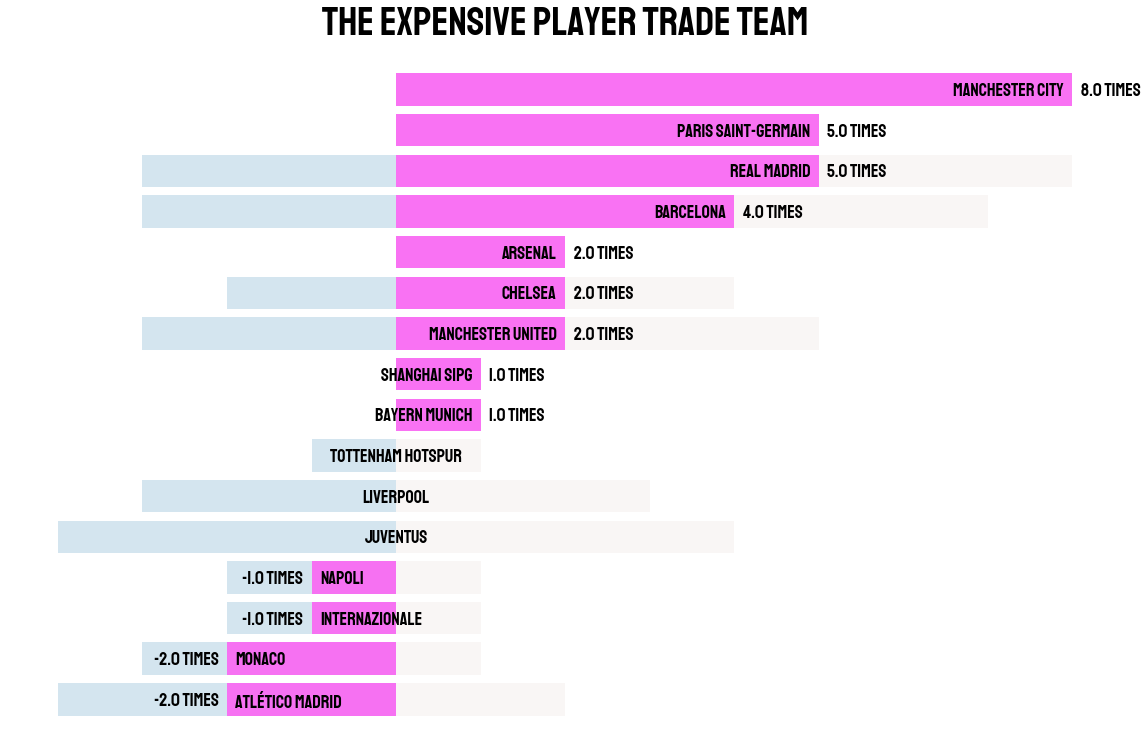

In [30]:
many_club_all = pd.DataFrame(many_club_all).reset_index()
many_club_sale_all = pd.DataFrame(many_club_sale_all).reset_index()
tmp = many_club_all.set_index('index').join(many_club_sale_all.set_index('index'))
tmp = tmp.fillna(0)
tmp['sum'] = tmp['To_Club'] -tmp['From_Club']
tmp = tmp.reset_index()
tmp = tmp.sort_values(by='sum').reset_index(drop=True)

fig, axes = plt.subplots(figsize=(20,13), facecolor="w")
plt.barh(width=tmp['To_Club'], y = tmp['index'],alpha= 0.5, color = '#F5EEED')
plt.barh(width=tmp['From_Club']*-1, y = tmp['index'], alpha=0.5, color = '#ABCDE0')
plt.barh(width=tmp['sum'], y = tmp['index'], alpha=0.9, color ='#FA64F3')

for i in range(len(tmp)):
    if tmp.loc[i,'sum'] > 0:
        plt.text(s=f"{tmp.loc[i,'index']}", x=tmp.loc[i,'sum']-0.1, y=i,font=font, fontsize=18,va='center',ha='right')
        plt.text(s=f"{tmp.loc[i,'sum']} times", x=tmp.loc[i,'sum']+0.1, y=i,font=font, fontsize=18,va='center',ha='left')

    elif tmp.loc[i,'sum'] < 0:
        plt.text(s=f"{tmp.loc[i,'index']}", x=tmp.loc[i,'sum']+0.1, y=i,font=font, fontsize=18,va='center',ha='left')
        plt.text(s=f"{tmp.loc[i,'sum']} times", x=tmp.loc[i,'sum']-0.1, y=i,font=font, fontsize=18,va='center',ha='right')

    else:
        plt.text(s=f"{tmp.loc[i,'index']}", x=tmp.loc[i,'sum'], y=i,font=font, fontsize=18,va='center',ha='center')

plt.title('The expensive player trade team', font=font, fontsize=40)
plt.axis('off')
plt.show()

### Surprisingly, the Manchester City only recruit 8times.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
3. Where is that expensive player's country?
</h1>
</div>

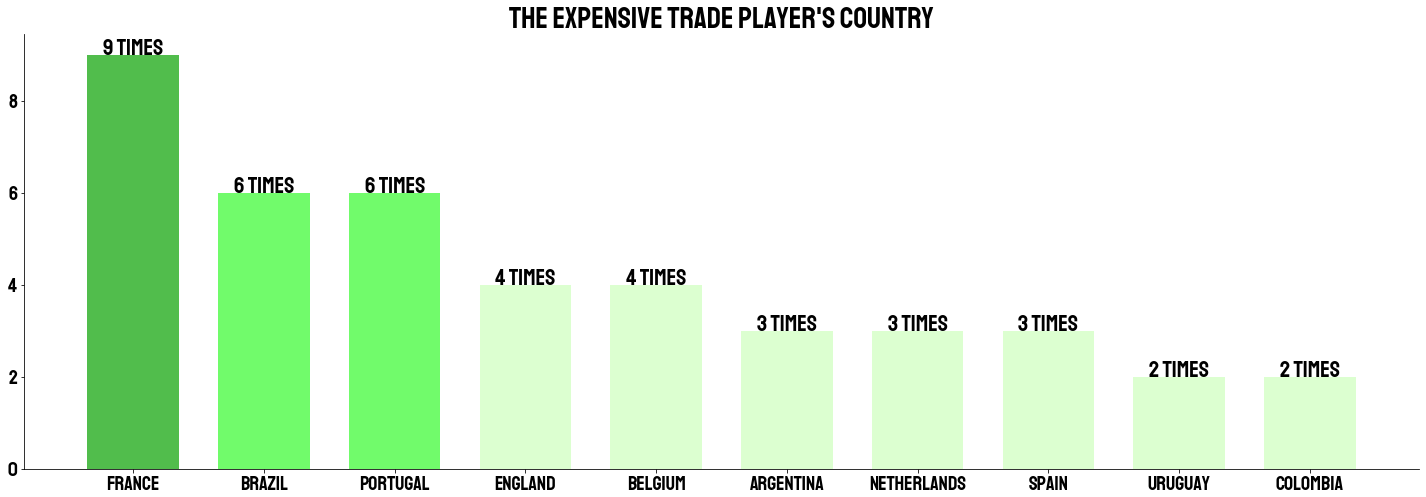

In [31]:
country = data['Origin'].value_counts()
country = pd.DataFrame(country[country > 1]).reset_index()
country.columns= ['country','count']
color = ['#26AD1F', '#4EFA46','#4EFA46']
color += ['#D4FFC5']*7
plt.figure(figsize=(25,8))
plt.bar(x=country['country'], height = country['count'],width=0.7,color =color,alpha=0.8)
plt.xticks(font=font,fontsize=20)
plt.yticks(font=font,fontsize=20)

for i in range(len(country)):
    plt.text(s= f"{country.loc[i,'count']} times", x= i, y=country.loc[i,'count'],va='bottom', ha='center',font=font, fontsize=23)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive trade player's country", font=font, fontsize=30)
plt.show()

### France is the country that the most trade player's country

C:\Users\hrishi\AppData\Local\Temp/ipykernel_3692/418875575.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


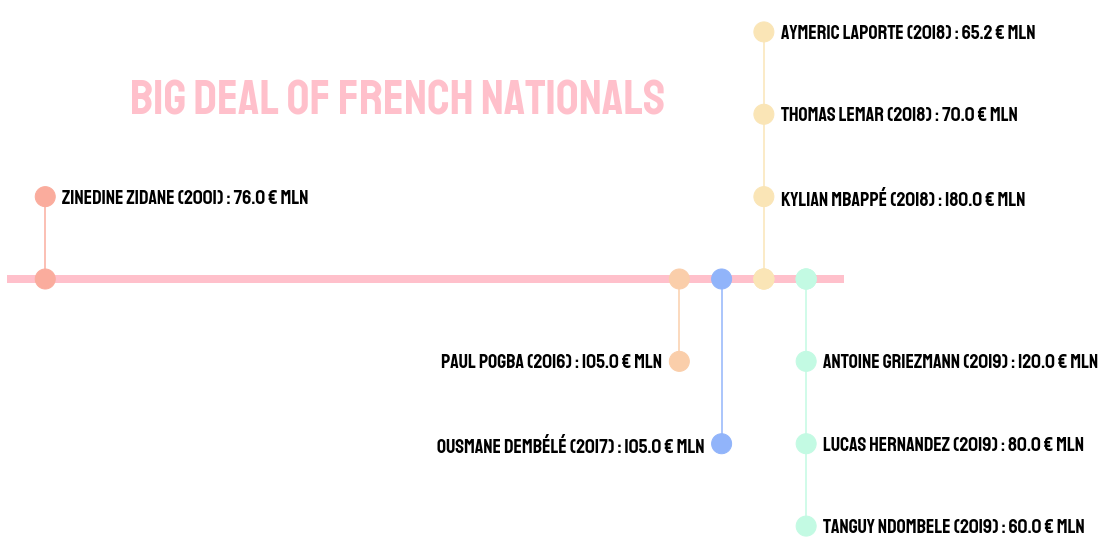

In [32]:
france = data[data['Origin'] =='France'].reset_index(drop=True)
fig = plt.figure(figsize=(15,10))
color = ['#FAE5B6','#C3FAE3','#FACEAA','#91B4FA','#C3FAE3','#FAAC9D','#FAE5B6','#FAE5B6','#C3FAE3']
plt.axhline(0,color='pink',lw=8,zorder=1)
plt.scatter(x=france['Year'], y=list([0]* 9),s=400,zorder=2,color = color)
plt.plot([2001,2001],[0,1],color = '#FAAC9D')
plt.plot([2016,2016],[0,-1],color = '#FACEAA')
plt.plot([2017,2017],[0,-2],color = '#91B4FA')
plt.plot([2018,2018],[0,3],color = '#FAE5B6')
plt.plot([2019,2019],[0,-3],color = '#C3FAE3')
color = ['#FAAC9D', '#FACEAA','#91B4FA','#FAE5B6','#FAE5B6','#FAE5B6','#C3FAE3','#C3FAE3','#C3FAE3']
plt.scatter([2001,2016,2017,2018,2018,2018,2019,2019,2019],[1,-1,-2,1,2,3,-1,-2,-3],s=400,color = color)
i = [5,2,3,0,6,7,1,4,8]
y = [1,-1,-2,1,2,3,-1,-2,-3]
position = ['left','right','right','left','left','left','left','left','left']
for j in range(9):
    if position[j] > 'left':
        x = france.loc[i[j],'Year'] -0.4
    else:
        x = france.loc[i[j],'Year'] +0.4
    plt.text(s=f"{france.loc[i[j],'Player']} ({france.loc[i[j],'Year']}) : {france.loc[i[j],'Fee_€ mln']} € mln" , x=x, y=y[j],font=font, fontsize=20,va='center',ha=position[j])
plt.text(s="Big Deal of French Nationals", x=2003, y=2, font=font, fontsize=50,color='pink')

plt.axis('off')
fig.show()

![](https://www.aim.com.au/sites/aim/files/field/image/AIM-Blog-Why-Thank-You-Matters-More-Than-Money-New.jpg)